In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the Data
census_df = pd.read_csv("adult.csv")

census_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# Summary of Data
census_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Exploring Data
census_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
print(census_df.shape)

# from inspection, missing values were autofilled with "?"
census_df.drop(census_df[census_df.values == "?"].index, inplace=True)

census_df.shape

(32561, 15)


(30162, 15)

In [7]:
print(census_df['income'].value_counts())

<=50K    22654
>50K      7508
Name: income, dtype: int64


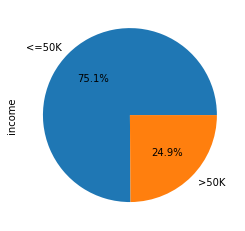

In [8]:
census_df['income'].value_counts().plot.pie(autopct='%1.1f%%')

In [9]:
# Grouping columns based on dtype
numeric = census_df.dtypes[census_df.dtypes != 'object']
non_numeric = census_df.dtypes[census_df.dtypes == 'object']

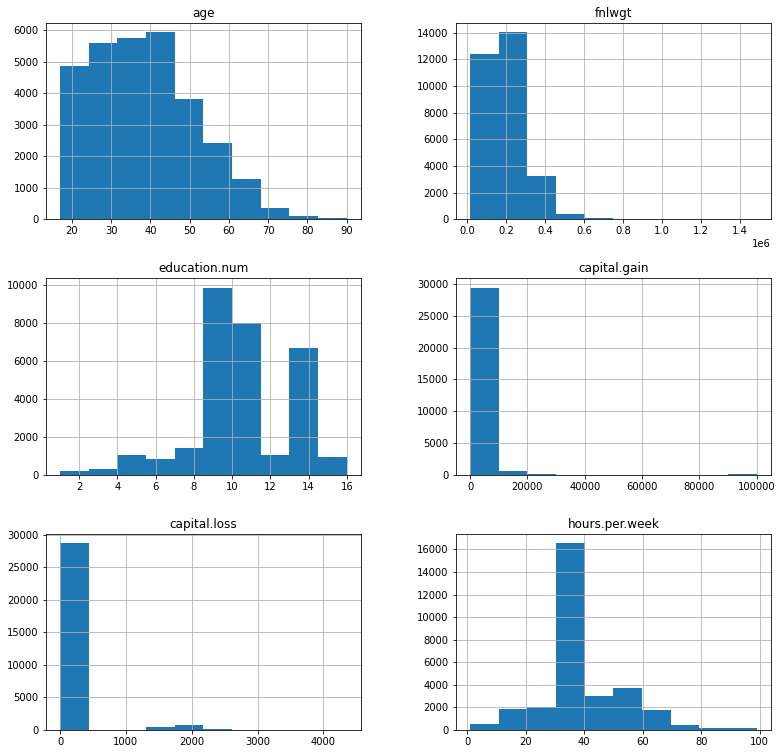

In [10]:
census_df[list(numeric.index)].hist(figsize = (13,13));

From the age plot we notice that there are a few outliers that might skew our algorithm so we'll drop them


In [11]:
#dropping rows with age 90
age_90 = census_df[census_df['age'] == 90].index
census_df.drop(labels = age_90,axis = 0,inplace =True)
census_df["age"].value_counts()

36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 71, dtype: int64

In [12]:
census_df['workclass'].value_counts()

Private             22259
Self-emp-not-inc     2496
Local-gov            2063
State-gov            1279
Self-emp-inc         1074
Federal-gov           942
Without-pay            14
Name: workclass, dtype: int64

In [13]:
# dropping those without pay from the dataset
without_pay = census_df[census_df['workclass'] == "Without-pay"].index
census_df.drop(labels = without_pay, axis = 0,inplace =True)
census_df["workclass"].value_counts()

Private             22259
Self-emp-not-inc     2496
Local-gov            2063
State-gov            1279
Self-emp-inc         1074
Federal-gov           942
Name: workclass, dtype: int64

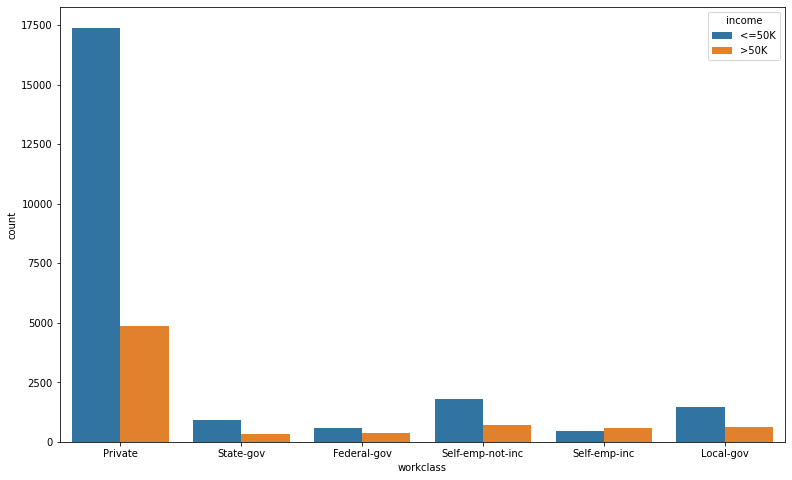

In [14]:
plt.figure(figsize=(13,8))
sns.countplot(data=census_df, x = 'workclass', hue = 'income')

In [15]:
# dropping the education column since we already have education.num
census_df.drop(['education'], axis = 1, inplace = True)

In [16]:
census_df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [17]:
census_df['marital.status'].value_counts()

Married-civ-spouse       14039
Never-married             9709
Divorced                  4213
Separated                  938
Widowed                    824
Married-spouse-absent      369
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [18]:
census_df['education.num'].value_counts()

9     9820
10    6670
13    5037
14    1623
11    1307
7     1046
12    1006
6      819
4      554
15     541
5      454
8      377
16     375
3      288
2      151
1       45
Name: education.num, dtype: int64

In [19]:
census_df['occupation'].value_counts()

Prof-specialty       4033
Craft-repair         4026
Exec-managerial      3984
Adm-clerical         3714
Sales                3582
Other-service        3205
Machine-op-inspct    1962
Transport-moving     1570
Handlers-cleaners    1348
Farming-fishing       982
Tech-support          912
Protective-serv       643
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [20]:
census_df['relationship'].value_counts()

Husband           12443
Not-in-family      7717
Own-child          4456
Unmarried          3207
Wife               1401
Other-relative      889
Name: relationship, dtype: int64

In [21]:
census_df['race'].value_counts()

White                 25893
Black                  2813
Asian-Pac-Islander      890
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

In [22]:
census_df['native.country'].value_counts()

United-States                 27460
Mexico                          610
Philippines                     186
Germany                         128
Puerto-Rico                     108
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          85
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [23]:
census_df["native.country"].count()

30113

In [24]:
perc_US = (27460/30113) * 100
print(f"The US makes up {perc_US}% of the native.country column.")

The US makes up 91.18985155912729% of the native.country column.


In [25]:
# With all other countries making up less than 10% of the native.country column, we can group them together
countries = np.array(census_df['native.country'].unique())
countries = np.delete(countries, 0)
census_df['native.country'].replace(countries, 'Other', inplace = True)
census_df['native.country'].value_counts()

United-States    27460
Other             2653
Name: native.country, dtype: int64

In [26]:
#Checking for duplicate entries
duplicate_rows = census_df[census_df.duplicated()]

print(duplicate_rows.count())

age               22
workclass         22
fnlwgt            22
education.num     22
marital.status    22
occupation        22
relationship      22
race              22
sex               22
capital.gain      22
capital.loss      22
hours.per.week    22
native.country    22
income            22
dtype: int64


In [27]:
#Dropping duplicates
census_df.drop_duplicates()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#####**Feature Engineering and Model Building**

In [28]:
census_df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [29]:
#Mapping Income Column: <=50K to 0, >50K to 1
census_df['income'] = census_df['income'].map({'<=50K':0, '>50K':1})
census_df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [30]:
census_df = pd.get_dummies(census_df, prefix_sep='_', drop_first=True)
census_df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_United-States
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,41,264663,10,0,3900,40,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
5,34,216864,9,0,3770,45,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
6,38,150601,6,0,3770,40,0,0,1,0,...,0,0,1,0,0,0,0,1,1,1


In [31]:
income = "income"
features = census_df.columns.tolist()
features.remove(income)
X = census_df.drop(columns= 'income' ) 
y = census_df[ 'income' ]

In [32]:
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_United-States
1,82,132870,9,0,4356,18,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,54,140359,4,0,3900,40,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
4,41,264663,10,0,3900,40,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
5,34,216864,9,0,3770,45,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
6,38,150601,6,0,3770,40,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1


In [33]:
import pickle
import os
from os import path
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn import metrics
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SklearnLinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [34]:
 def ConfusionMatrix(classifier, X=X, y=y, confusionMatrix = True, plotConfusionMatrix = True):
        
        #split dataset into train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, 
                                                            stratify=y)

        # Fit the classifier to the data
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        #computing the confusion matrix with each row corresponding to the true class
        if(confusionMatrix):
            print(confusion_matrix(y_test, y_pred))

        #drawing Plot Confusion Matrix
        if(plotConfusionMatrix):
            plot_confusion_matrix(classifier, X_test, y_test)  
            plt.show()

In [35]:
def GridSearch(param, estimator, X=X, y=y):
    # split into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    grid_rf = GridSearchCV(estimator, param, refit = True, verbose = 3, n_jobs=-1) 

    # fitting the model for grid search 
    grid_rf.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid_rf.best_params_) 
    grid_rf_predictions = grid_rf.predict(X_test) 

    # print classification report 
    print(classification_report(y_test, grid_rf_predictions))

In [36]:
def CVmodel(nFolds = 5, randomState=59, features=features, lin_reg = False, lin_reg_without_fi = False,
            cutoff=0.5, debug= False, model = SVC(), df = census_df, pipeline = False):
    
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)
    
    # predictions for individual folds
    predictions = []

    # the index in the original file
    indices = []
    true=[]
    
    if lin_reg:
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train]["income"])

            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            # preds = model.predict_proba(df.iloc[test][features])[:,1]
            preds, y_test = model.predict(df.iloc[test][features], round(cutoff,1))
            
            # information about predictions for this fold
            predictions.append(preds.tolist().copy())
            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
            
            true = (df.iloc[test]["income"]==1)
            if(lin_reg_without_fi == False):
                feature_importance = model.coef_
        if(lin_reg_without_fi):
            return predictions, indices, true
            
        return predictions, indices, feature_importance, true

    if(pipeline):
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train]["income"])

            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            preds = model.predict_proba(df.iloc[test][features])[:,1]

            # information about predictions for this fold
            predictions.append(preds.tolist().copy())

            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
        
        return predictions, indices, true
        
    for train, test in kf.split(df.index.values):
        if debug:
            print(model)
        model.fit(df.iloc[train][features], df.iloc[train]["income"])

        # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
        preds = model.predict_proba(df.iloc[test][features])[:,1]

        # information about predictions for this fold
        predictions.append(preds.tolist().copy())

        # indexed in the original data frame
        indices.append(df.iloc[test].index.tolist().copy())

        true.append(df.iloc[test]["income"]==1)

        feature_importance = model.feature_importances_
        
    return predictions, indices, feature_importance, true


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


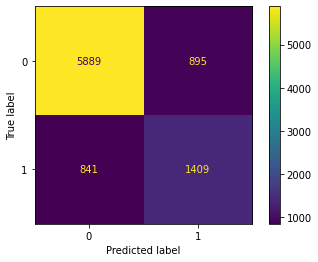

In [37]:
# Create Decision Tree classifer object
tree = DecisionTreeClassifier()

ConfusionMatrix(classifier=tree, confusionMatrix=False)


In [38]:
tree = DecisionTreeClassifier()
predictions, indices, feature_importance, true = CVmodel(model=tree)

tree = {
    "name":"Decision Tree",
    "predictions" : predictions,
    "indices": indices,
    "feature importance": feature_importance,
    "true":true
}


In [39]:
os.mkdir('models_results')
# open the file for binary writing using "with"
with open("models_results/decision_tree.p", "wb") as fp:
    pickle.dump(tree, fp)


In [40]:
#Random Forest
param = {'max_depth': [2, 10, 20],
         'n_estimators': [100, 500],
         'max_features': [10 , 20]}

GridSearch(param = param, estimator = RandomForestClassifier())


Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'max_depth': 20, 'max_features': 10, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5650
           1       0.78      0.62      0.69      1879

    accuracy                           0.86      7529
   macro avg       0.83      0.78      0.80      7529
weighted avg       0.86      0.86      0.85      7529



In [41]:
param = {'max_depth': [20, 50],
         'max_features': [10, 30],
         'min_samples_split': [10, 30]}

GridSearch(param=param, estimator=RandomForestClassifier())


Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 50, 'max_features': 10, 'min_samples_split': 30}
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5650
           1       0.78      0.63      0.69      1879

    accuracy                           0.86      7529
   macro avg       0.83      0.78      0.80      7529
weighted avg       0.86      0.86      0.86      7529



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


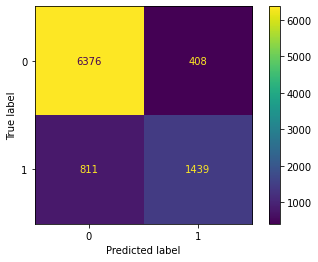

In [42]:
#Random Forest model 
rand_forest = RandomForestClassifier(random_state=59, n_jobs=-1, n_estimators=100, 
                                 max_depth=50, max_features=10, min_samples_split=30)

ConfusionMatrix(classifier=rand_forest, confusionMatrix=False)


In [43]:
rand_forest = RandomForestClassifier(random_state=59, n_jobs=-1, n_estimators=100, 
                                 max_depth=50, max_features=10, min_samples_split=30)

predictions, indices, feature_importance, true = CVmodel(model=rand_forest)

random_forest = {
    "name":"Random Forest",
    "predictions": predictions,
    "indices": indices,
    "feature importance": feature_importance,
    "true":true
}




In [44]:
# open the file for binary writing using "with"
with open("models_results/random_forest.p", "wb") as fp:
    pickle.dump(random_forest, fp)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


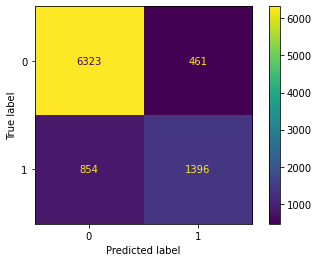

In [45]:
#Logistic Regression
#Standardization of data and KNN model 
logreg_scaler = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('logreg', LogisticRegression())
                ])
ConfusionMatrix(classifier=logreg_scaler, confusionMatrix=False)


In [46]:
predictions, indices, true = CVmodel(model=logreg_scaler, pipeline = True)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
feature_importance = model.coef_[0]
# feature_importance = logreg_scaler.steps[1][1].coef_[0]
logistic_regression = {
    "name":"Logistic Regression",
    "predictions": predictions,
    "indices": indices,
    "feature importance": feature_importance,
    "true":true
}


In [47]:
# open the file for binary writing using "with"
with open("models_results/logistic_regression.p", "wb") as fp:
    pickle.dump(logistic_regression, fp)


In [48]:
#KNN
#Standardization of data and KNN model 
pipe = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())
                ])

param = {'knn__n_neighbors': [10, 100],
         'knn__weights': ['uniform', 'distance'],
         'knn__p': [1, 2]}

GridSearch(param=param, estimator=pipe)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'knn__n_neighbors': 100, 'knn__p': 1, 'knn__weights': 'distance'}
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5650
           1       0.70      0.57      0.63      1879

    accuracy                           0.83      7529
   macro avg       0.78      0.74      0.76      7529
weighted avg       0.82      0.83      0.82      7529



In [49]:
#Standardization of data and KNN model 
pipe = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    ('knn', KNeighborsClassifier())
                ])

param = {'knn__n_neighbors': [10, 50],
         'knn__weights': ['uniform'],
         'knn__p': [1]}

GridSearch(param=param, estimator=pipe)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'knn__n_neighbors': 50, 'knn__p': 1, 'knn__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5650
           1       0.71      0.56      0.62      1879

    accuracy                           0.83      7529
   macro avg       0.78      0.74      0.76      7529
weighted avg       0.82      0.83      0.82      7529



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


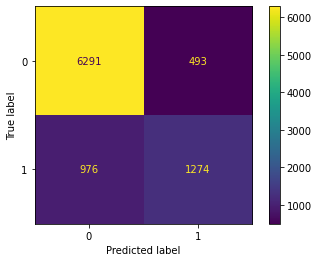

In [50]:
#Standardization of data and KNN model 
knn_standarization = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=50, p=1, weights='uniform'))
                ])

ConfusionMatrix(classifier=knn_standarization, confusionMatrix=False)

In [51]:
#Standardization of data and KNN model 
knn_standarization = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=50, p=1, weights='uniform'))
                ])

predictions, indices, true = CVmodel(model=knn_standarization, pipeline=True)


In [52]:
knn = {
    "name":"K-Nearest Neighbours",
    "predictions": predictions,
    "indices": indices,
    "true":true
}


In [53]:
# open the file for binary writing using "with"
with open("models_results/k-nearest_neighbours.p", "wb") as fp:
    pickle.dump(knn, fp)

In [54]:
#SVM
# split into a training and testing set
pipe = Pipeline(steps=[
                ('scaler', StandardScaler()), 
                ('svc', SVC())
                ])

param = {'svc__C': [1, 10],
         'svc__kernel': ['linear', 'poly']}

GridSearch(param=param, estimator=pipe)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'svc__C': 1, 'svc__kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5650
           1       0.73      0.60      0.66      1879

    accuracy                           0.84      7529
   macro avg       0.80      0.76      0.78      7529
weighted avg       0.84      0.84      0.84      7529



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


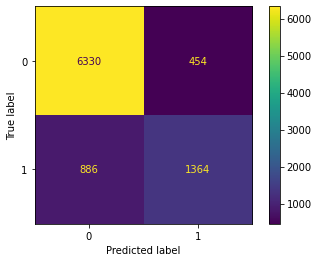

In [55]:
#Standardization of data and KNN model 
svm_standarization = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('svm',  SVC(kernel='linear', C=1, gamma='scale', probability=True))
                ])

ConfusionMatrix(classifier=svm_standarization, confusionMatrix=False)


In [56]:
#Standardization of data and KNN model 
svm_standarization = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('svm',  SVC(kernel='linear', C=1, gamma='scale', probability=True))
                ])
predictions, indices, true = CVmodel(model=svm_standarization, pipeline=True)
feature_importance = svm_standarization.steps[1][1].coef_[0]
svm = {
    "name":"Support Vector Machine",
    "predictions": predictions,
    "indices": indices,
    "feature importance": feature_importance,
    "true" : true
}



In [57]:
# open the file for binary writing using "with"
with open("models_results/support_vector_machine.p", "wb") as fp:
    pickle.dump(svm, fp)


In [58]:
#FINDINGS
# Let's also load previously saved models
with open("models_results/decision_tree.p", "rb") as fp:
    tree = pickle.load(fp)
    
with open("models_results/random_forest.p", "rb") as fp:
    rand_forest = pickle.load(fp)
    
with open("models_results/logistic_regression.p", "rb") as fp:
    log_reg = pickle.load(fp)
    
with open("models_results//k-nearest_neighbours.p", "rb") as fp:
    knn = pickle.load(fp)
    
with open("models_results/support_vector_machine.p", "rb") as fp:
    svm = pickle.load(fp)

In [59]:
listOfResults = []
true = (census_df["income"]==1)
for result in [tree, rand_forest, log_reg, knn, svm]:
    pred = pd.Series(sum(result["predictions"], []), 
                     index=sum(result["indices"], [])).sort_index()
    listOfResults.append((true, pred, result["name"]))

In [63]:
def plotROCs(results, saving = False):
    # Determining the size of the drawing
    fig, ax = plt.subplots(figsize=(10,9))
    ax.set_facecolor((0,0,0.1))
    
        
    for true, pred, label in results:
        
        # Calculation of the points needed to draw the ROC curve
        # the roc_curve function concludes three data series, fpr, 
        #tpr, and cutoff levels
        fpr, tpr, thresholds = roc_curve(true, pred)
        
        # We calculate the area under the curve
        rocScore = roc_auc_score(true, pred)
        rocScore = round(rocScore, 3)
        
        # curve thickness
        lw = 2

        # We draw the ROC curve
        ax.plot(fpr, tpr, lw=lw, label=f'{label}: {rocScore}')
  
    # We draw a 45 degree curve as a reference point
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    
    # We add light margins to the range so that the curve 
    #does not coincide with the axes
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic - {rocScore}')
    ax.legend(loc="lower right")

    plt.show()

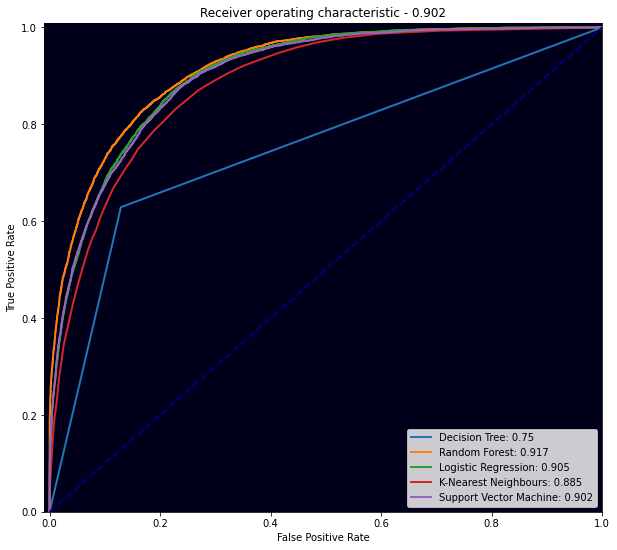

In [64]:
plotROCs(listOfResults, saving = True)


Random Forest has the best value

In [65]:
model = RandomForestClassifier(random_state=59, n_jobs=-1, n_estimators=100, 
                                 max_depth=50, max_features=10, min_samples_split=30)
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
output = pd.DataFrame({'index': X_test.index, 'income >$50K/yr': predictions})

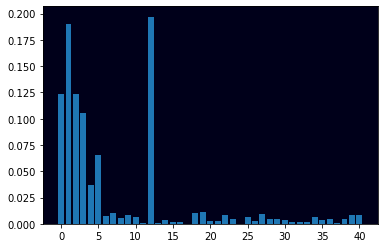

In [66]:
#FEATURE IMPORTANCE
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
plt.bar([x for x in range(len(tree["feature importance"]))], tree["feature importance"])
plt.show()

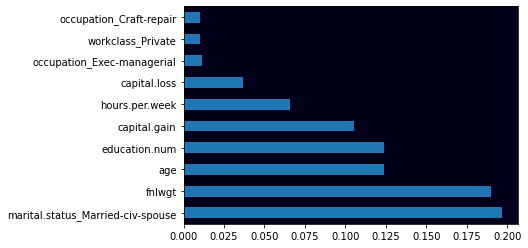

In [67]:
#Decision Tree Feature Importance
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
feat_importances_dt = pd.Series(tree["feature importance"], index=features)
feat_importances_dt.nlargest(10).plot(kind='barh')
plt.show()

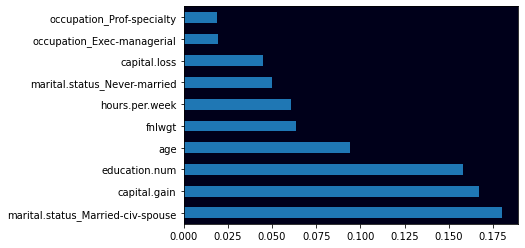

In [68]:
#Random Forest Feature Importance
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
feat_importances_rf = pd.Series(rand_forest["feature importance"], index=features)
feat_importances_rf.nlargest(10).plot(kind='barh')
plt.show()

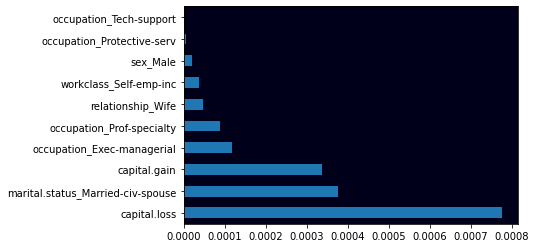

In [69]:
#Logistic Regression Feature Importance
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
feat_importances_logr = pd.Series(log_reg["feature importance"], index=features)
feat_importances_logr.nlargest(10).plot(kind='barh')
plt.show()

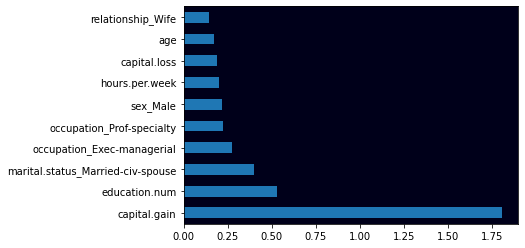

In [70]:
#SVM Feature Importance
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
feat_importances_svm = pd.Series(svm["feature importance"], index=features)
feat_importances_svm.nlargest(10).plot(kind='barh')
plt.show()